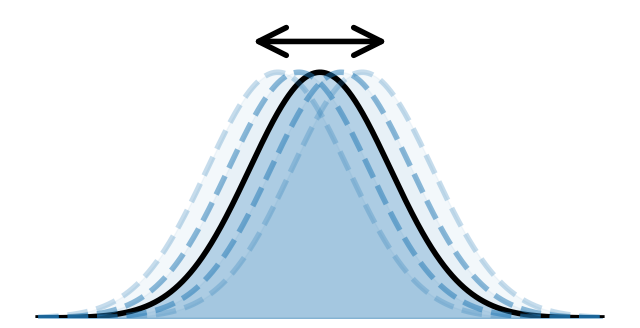

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the mean and standard deviation
mu, sigma = 0, 1

# Create a range of values
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Plot the normal distribution
fig_size = (8, 4)
fig, ax = plt.subplots(1, 1, figsize=fig_size, sharex=False, sharey=True)

alpha_base_factor = 1
lw_factor = 2
shift_factor = 0.3

plt.plot(x, norm.pdf(x, mu, sigma), label='', linestyle='-',lw=lw_factor * 2, color='black')
plt.fill_between(x, norm.pdf(x, mu, sigma), alpha=0.25*alpha_base_factor, color='tab:blue')

plt.plot(x, norm.pdf(x, mu-(shift_factor *1), sigma), label='', linestyle='--',lw=lw_factor * 2, alpha=0.5*alpha_base_factor, color='tab:blue')
plt.fill_between(x, norm.pdf(x, mu-(shift_factor *1), sigma), alpha=0.05*alpha_base_factor, color='tab:blue')
plt.plot(x, norm.pdf(x, mu+(shift_factor *1), sigma), label='', linestyle='--',lw=lw_factor * 2,alpha=0.5*alpha_base_factor, color='tab:blue')
plt.fill_between(x, norm.pdf(x, mu+(shift_factor *1), sigma), alpha=0.05*alpha_base_factor, color='tab:blue')

plt.plot(x, norm.pdf(x, mu-(shift_factor *2), sigma), label='', linestyle='--',lw=lw_factor * 2, alpha=0.25*alpha_base_factor, color='tab:blue')
plt.fill_between(x, norm.pdf(x, mu-(shift_factor *2), sigma), alpha=0.05*alpha_base_factor, color='tab:blue')
plt.plot(x, norm.pdf(x, mu+(shift_factor *2), sigma), label='', linestyle='--',lw=lw_factor * 2, alpha=0.25*alpha_base_factor, color='tab:blue')
plt.fill_between(x, norm.pdf(x, mu+(shift_factor *2), sigma), alpha=0.05*alpha_base_factor, color='tab:blue')

# Draw arrows indicating standard deviation
plt.annotate('', xy=(mu - sigma, norm.pdf(mu, mu, sigma)+0.05), xytext=(mu + sigma, norm.pdf(mu, mu, sigma)+0.05),
             arrowprops=dict(arrowstyle="<->",lw=lw_factor * 2,mutation_scale=50, color='black'))

# Remove axis ticks and labels
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
plt.ylim(0, 0.5)

plt.box(False)
plt.show()


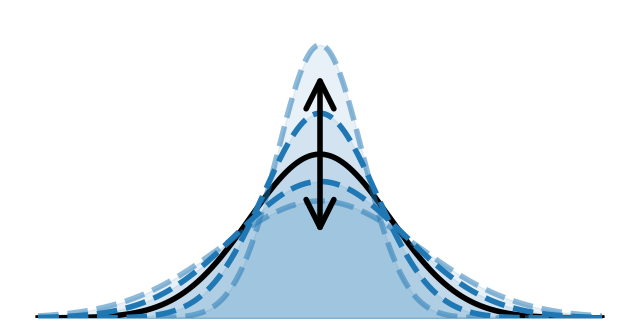

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the mean and standard deviation
mu, sigma = 0, 1

# Create a range of values
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Plot the normal distribution
fig_size = (8, 4)
fig, ax = plt.subplots(1, 1, figsize=fig_size, sharex=False, sharey=True)

alpha_base_factor = 2
fill_alpha = 0.05

lw_factor = 2
shift_factor = 0.2


plt.plot(x, norm.pdf(x, mu, sigma), label='', linestyle='-',lw=lw_factor * 2, color='black')
plt.fill_between(x, norm.pdf(x, mu, sigma), alpha=fill_alpha*alpha_base_factor, color='tab:blue')

plt.plot(x, norm.pdf(x, mu, sigma-(shift_factor *1)), label='', linestyle='--',lw=lw_factor * 2, alpha=0.5*alpha_base_factor, color='tab:blue')
plt.fill_between(x, norm.pdf(x, mu, sigma-(shift_factor *1)), alpha=fill_alpha*alpha_base_factor, color='tab:blue')
plt.plot(x, norm.pdf(x, mu, sigma+(shift_factor *1)), label='', linestyle='--',lw=lw_factor * 2,alpha=0.5*alpha_base_factor, color='tab:blue')
plt.fill_between(x, norm.pdf(x, mu, sigma+(shift_factor *1)), alpha=fill_alpha*alpha_base_factor, color='tab:blue')

plt.plot(x, norm.pdf(x, mu, sigma-(shift_factor *2)), label='', linestyle='--',lw=lw_factor * 2, alpha=0.25*alpha_base_factor, color='tab:blue')
plt.fill_between(x, norm.pdf(x, mu, sigma-(shift_factor *2)), alpha=fill_alpha*alpha_base_factor, color='tab:blue')
plt.plot(x, norm.pdf(x, mu, sigma+(shift_factor *2)), label='', linestyle='--',lw=lw_factor * 2, alpha=0.25*alpha_base_factor, color='tab:blue')
plt.fill_between(x, norm.pdf(x, mu, sigma+(shift_factor *2)), alpha=fill_alpha*alpha_base_factor, color='tab:blue')

# Draw arrows indicating standard deviation
plt.annotate('', xy=(mu, norm.pdf(mu, mu, sigma)-0.2), xytext=(mu, norm.pdf(mu, mu, sigma)+0.2),
             arrowprops=dict(arrowstyle="<->",lw=lw_factor * 2,mutation_scale=50, color='black'))

# Remove axis ticks and labels
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
plt.ylim(0, 0.75)

plt.box(False)
plt.show()


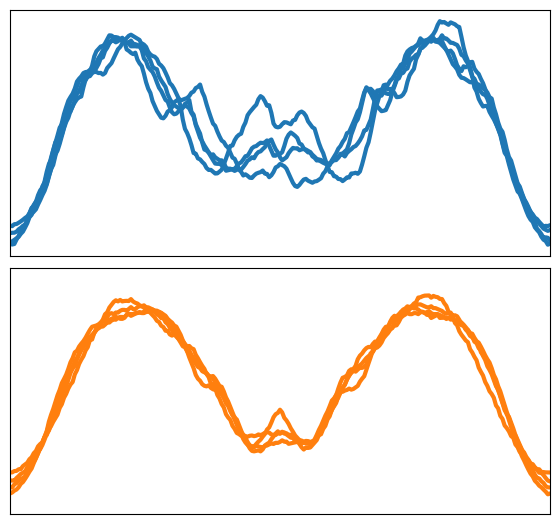

In [1]:
# %%
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
from scripts.get_root import PROJECT_ROOT

from src.utils import _load_data_set, list_data_sets
from src.utils_visualization import NotebookFigureSaver
from src.utils_performance import (
    _get_data_set_descriptive_performance,
    _get_performance_master_dict
)
from tqdm import tqdm
from matplotlib.cm import get_cmap


data_set_name: str = "ArrowHead"
n_samples_per_class: int = 4
max_number_classes: int = 2

train_data, test_data = _load_data_set(
    data_set_name=data_set_name, multivariate=False
)

classes = train_data["class_val"].unique()
available_classes = len(classes)

if available_classes > max_number_classes:
    classes = classes[:max_number_classes]

cmap = matplotlib.colormaps.get_cmap("tab10")  # You can choose different colormaps like 'viridis', 'plasma', etc.

# Create subplots for each class
fig, axes = plt.subplots(
    len(classes), 1, figsize=(6, 3 * len(classes)), sharex=True, sharey=True
)

for i, target_class in enumerate(sorted(classes)):
    # Filter the data for the current class
    class_data = train_data[train_data["class_val"] == target_class]

    # Select n random samples from the target class
    class_samples = class_data.sample(n=n_samples_per_class)

    first_instance_in_class = True
    # Plot the selected time series on the corresponding subplot with the same color
    for idx, row in class_samples.iterrows():
        axes[i].plot(
            row["dim_0"], color=cmap(0) if i ==0 else cmap(1), alpha=1,  linewidth=3,
        ) 

    if i >= max_number_classes:
        break
plt.xticks([])
plt.xlim(0, 250)
plt.yticks([])
plt.xlabel('')
plt.ylabel('')

plt.subplots_adjust(hspace=.05, wspace=0., left=0.1, right=1., bottom=0.11, top=.95) 
plt.show()

Text(0, 0.5, '')

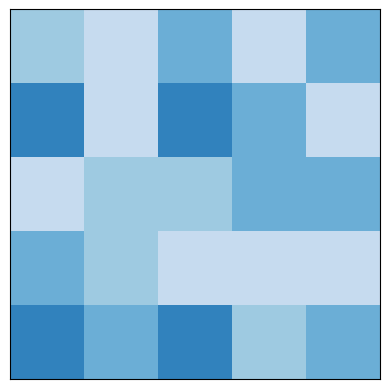

In [168]:
# generate a randomly generated 4x4 heatmap 
data = np.random.rand(5,5)
fig, ax = plt.subplots()
cax = ax.matshow(data, cmap='tab20c', vmin=0, vmax=5)

plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')